In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates


In [4]:
#pip install mplfinance

In [5]:
data = pd.read_csv("/content/AAPL_2006-01-01_to_2018-01-01 (1).csv", parse_dates=['Date'])
data.set_index('Date', inplace=True)

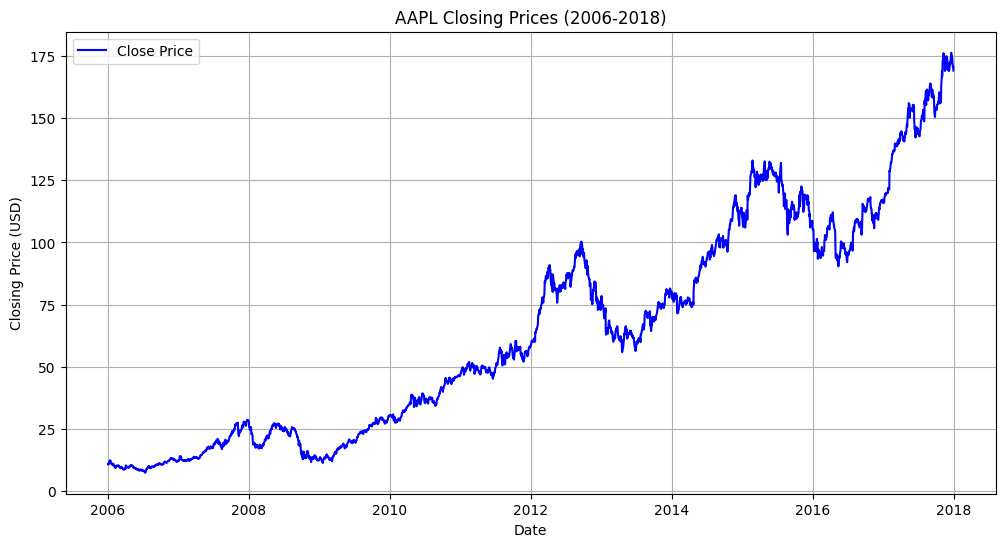

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.title('AAPL Closing Prices (2006-2018)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

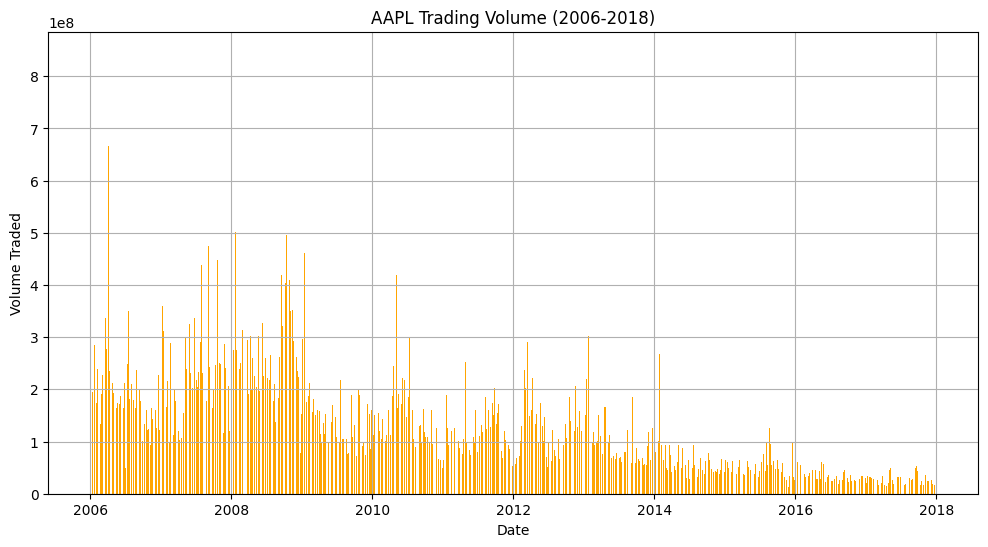

In [7]:
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Volume'], color='orange')
plt.title('AAPL Trading Volume (2006-2018)')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.grid(True)
plt.show()

<ipython-input-8-5d233c68133d>:6: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  data_candle['Date'] = mdates.date2num(data_candle['Date'].dt.to_pydatetime())


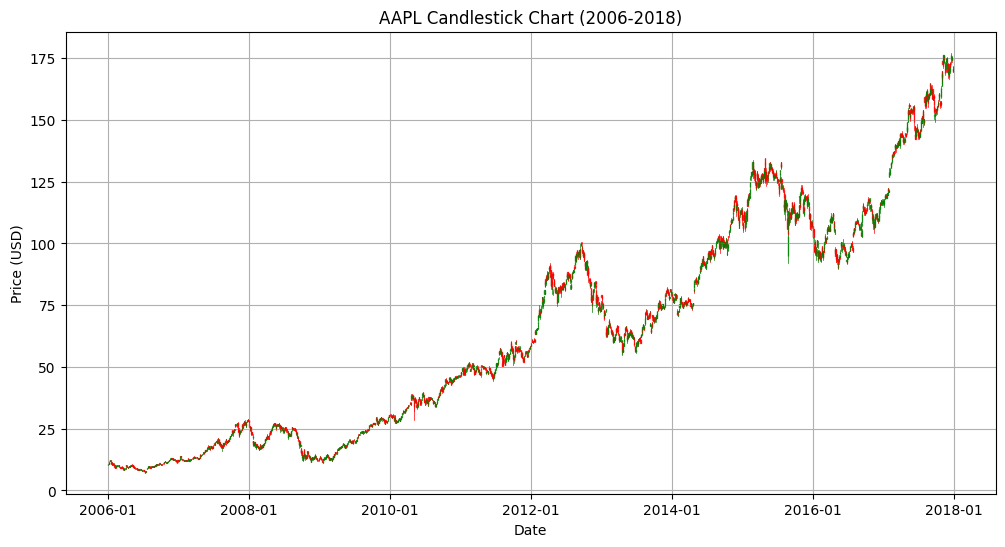

In [8]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Prepare data for candlestick chart
data_candle = data.reset_index()
data_candle['Date'] = mdates.date2num(data_candle['Date'].dt.to_pydatetime())
ohlc = data_candle[['Date', 'Open', 'High', 'Low', 'Close']]

fig, ax = plt.subplots(figsize=(12, 6))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('AAPL Candlestick Chart (2006-2018)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

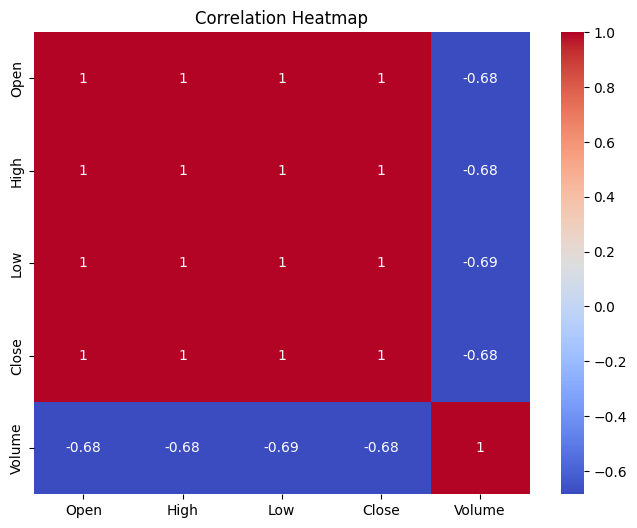

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

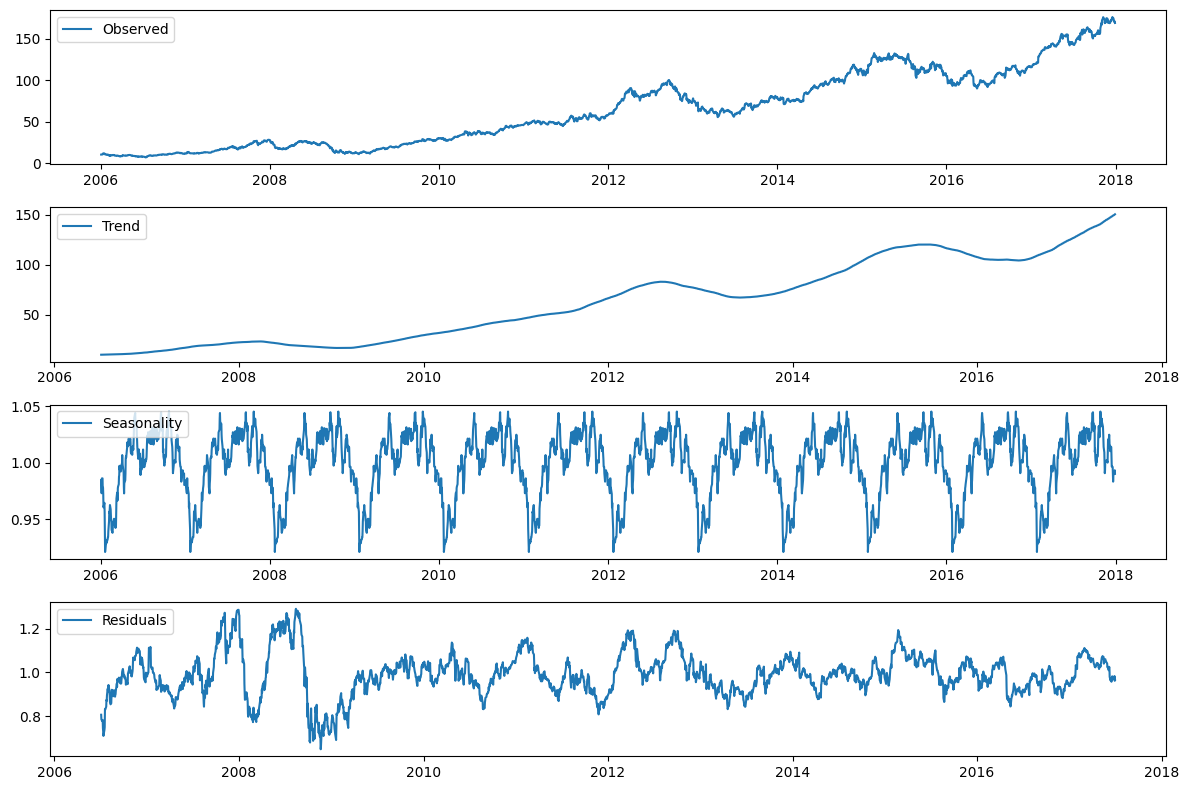

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
#data = pd.read_csv(r"C:\Users\olivi\Downloads\AAPL_2006-01-01_to_2018-01-01 (1).csv", parse_dates=['Date'], index_col='Date')

# Time-Series Decomposition
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=252)  # 252 trading days in a year

# Plotting the Decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


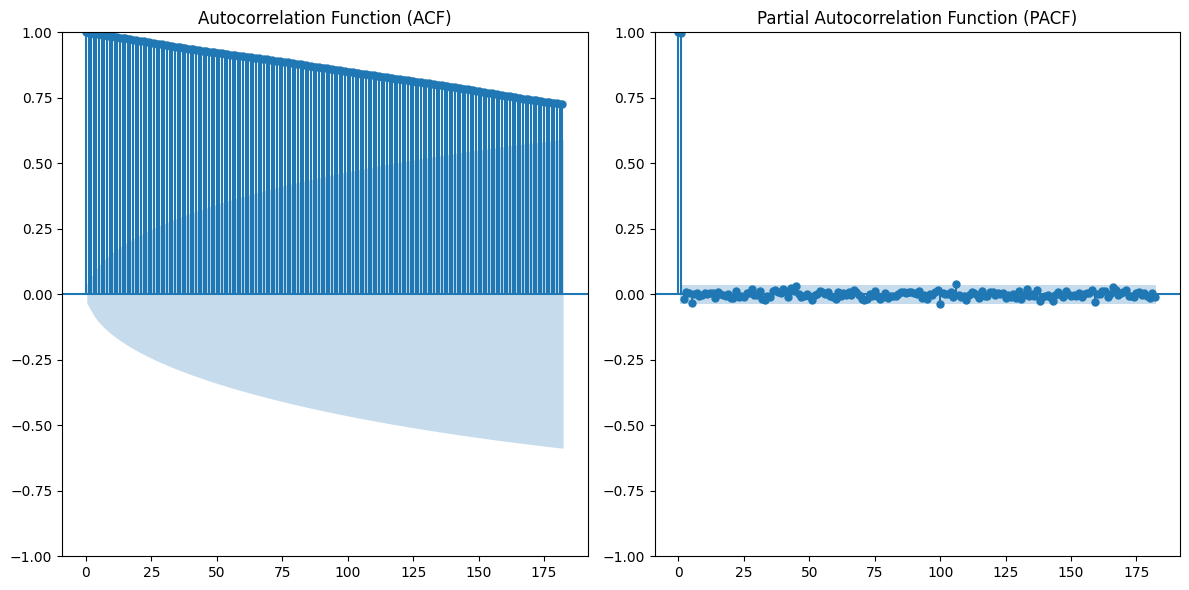

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF
plt.figure(figsize=(12, 6))

# Autocorrelation Function (ACF)
plt.subplot(121)
plot_acf(data['Close'], lags=182, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Partial Autocorrelation Function (PACF)
plt.subplot(122)
plot_pacf(data['Close'], lags=182, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


##### MISSING VALUES

In [12]:
data.isnull().sum() # check for missing values

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0


###### DATA SYNCHRONOUS

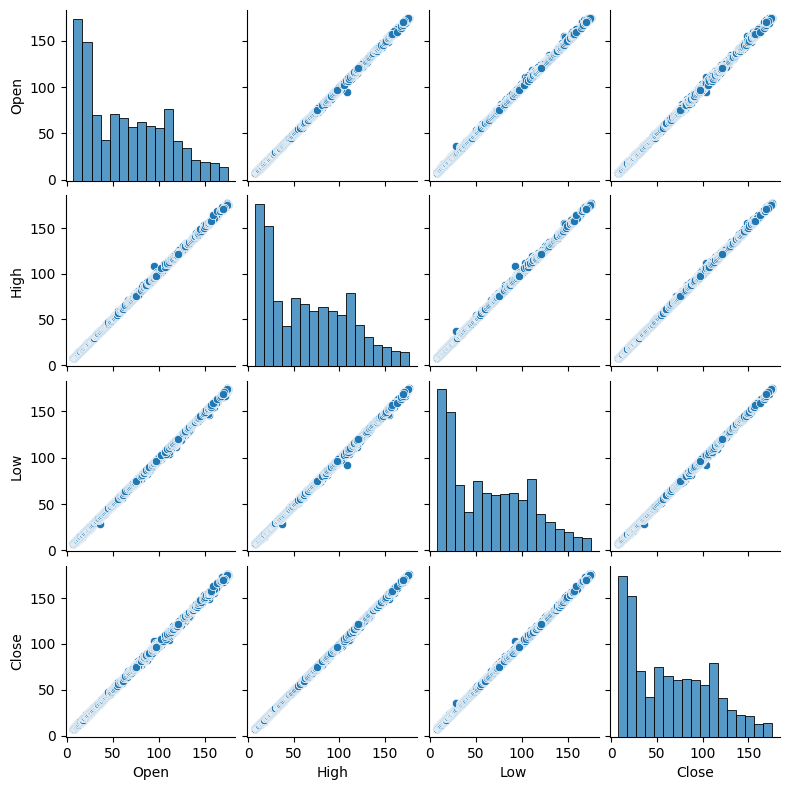

In [13]:
# Pair plot to check correlation and synchrony between variables
sns.pairplot(data[['Open', 'High', 'Low', 'Close']], height =2)
#plt.suptitle('Pair Plot of Stock Prices', y=1.02)
plt.show()


#### Baseline model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po

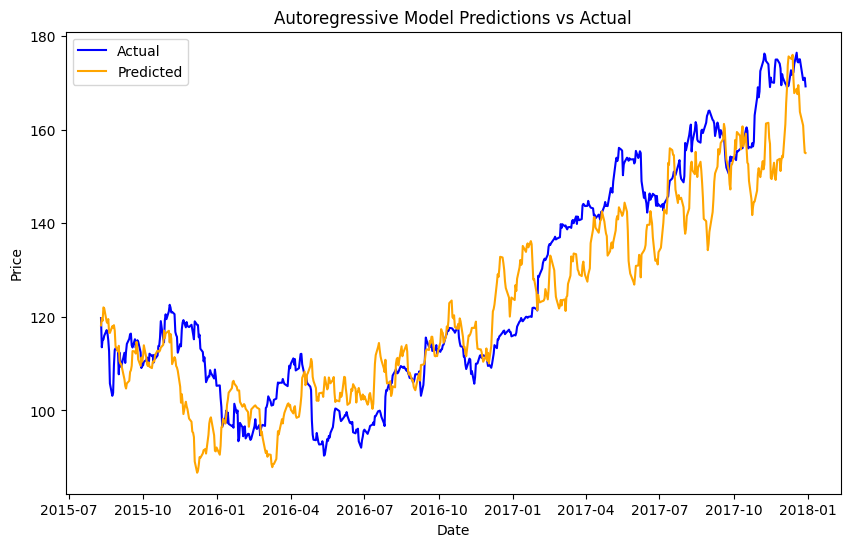

RMSE: 10.533144055467549


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
#data = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'], index_col='Date')

# We will use 'Close' prices for forecasting
close_prices = data['Close']

# Split the data into training and testing sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

# Fit the AutoReg model
model = AutoReg(train, lags=730)
model_fitted = model.fit()

# Make predictions
predictions = model_fitted.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Evaluate the model using RMSE
rmse = sqrt(mean_squared_error(test, predictions))

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='orange')
plt.title('Autoregressive Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print(f"RMSE: {rmse}")


WEEK 4

**RNN model**

In [59]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense


In [60]:
data = data[['Close']]

Normalize data

In [61]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

split the  data into train, validation and test

In [62]:
train_size = int(len(scaled_data) * 0.70)
val_size = int(len(scaled_data) * 0.15)
train_data = scaled_data[:train_size]
val_data = scaled_data[train_size:train_size + val_size]
test_data = scaled_data[train_size + val_size:]

window for prediction

In [63]:
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(seq_length, len(data)):
        sequences.append(data[i-seq_length:i, 0])
        labels.append(data[i, 0])
    return np.array(sequences), np.array(labels)

In [64]:
seq_length = 60

Sequence for train, validation adn test sets

In [65]:
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [66]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [67]:
X_train.shape, X_val.shape, X_test.shape

((2053, 60, 1), (392, 60, 1), (394, 60, 1))

Lest visualize train, validation and test sets portions

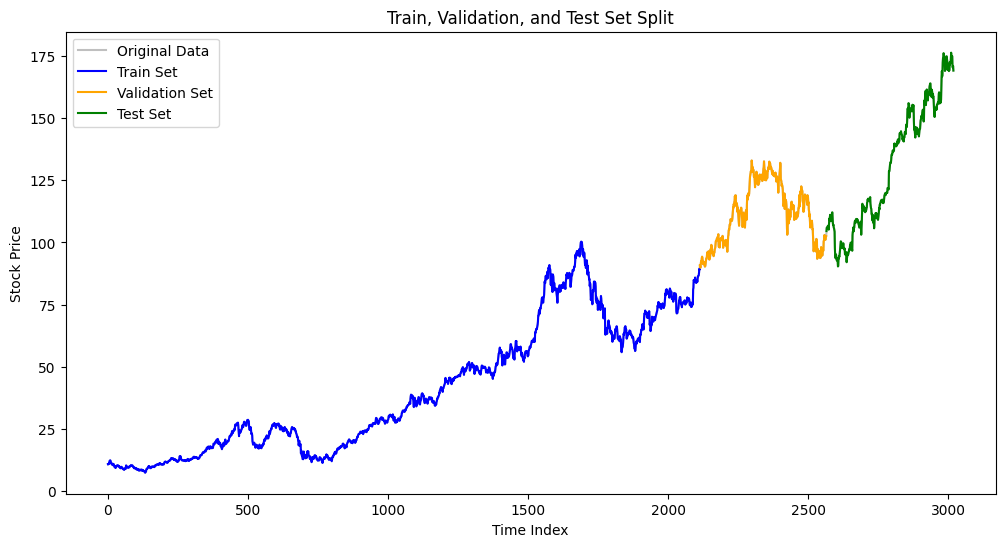

In [68]:
data_values = data['Close'].values

# Create indices
train_idx = range(len(train_data))
val_idx = range(len(train_data), len(train_data) + len(val_data))
test_idx = range(len(train_data) + len(val_data), len(scaled_data))

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data_values, label="Original Data", color="gray", alpha=0.5)
plt.plot(train_idx, data_values[:len(train_data)], label="Train Set", color="blue")
plt.plot(val_idx, data_values[len(train_data):len(train_data) + len(val_data)], label="Validation Set", color="orange")
plt.plot(test_idx, data_values[len(train_data) + len(val_data):], label="Test Set", color="green")

# Add labels and legend
plt.title("Train, Validation, and Test Set Split")
plt.xlabel("Time Index")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


Building RNN model

In [69]:
model = Sequential([
    SimpleRNN(200, return_sequences=True, input_shape=(seq_length, 1)),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(50, return_sequences=True),
    SimpleRNN(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compile model and train it

In [70]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [71]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)             │ (None, 60, 200)             │          40,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_9 (SimpleRNN)             │ (None, 60, 100)             │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_10 (SimpleRNN)            │ (None, 60, 50)              │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_11 (SimpleRNN)            │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,401 (329.69 KB)

 Trainable params: 84,401 (329.69 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
import time
start = time.time()
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Training time: {end - start} seconds")

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.1439 - val_loss: 0.0140
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.1392e-04 - val_loss: 9.5317e-04
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.1698e-04 - val_loss: 0.0016
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 3.5609e-04 - val_loss: 0.0013
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 5.6091e-04 - val_loss: 8.3771e-04
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 7.8519e-04 - val_loss: 5.9628e-04
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0010 - val_loss: 0.0027
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 3.4884e-04 - val_loss: 0.0048
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 5.5854e-04 - val_loss: 0.0010
Epoch 11/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.5353e-04 - val_loss: 0.0012
Epoch 12/20
65/65 

Plot the training and validation loss

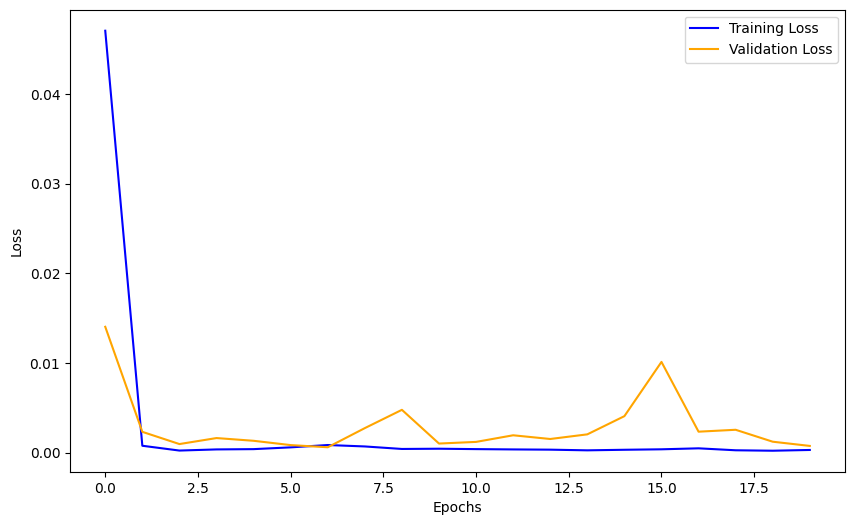

In [73]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
#plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Evaluate model

In [74]:
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0035
Test Loss: 0.009163751266896725


prediction

In [81]:
RNNpredictions = model.predict(X_test)
RNNpredictions = scaler.inverse_transform(RNNpredictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [82]:
RNNpredictions.shape

(394, 1)

Metrics measurements

In [83]:
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [84]:
mse = mean_squared_error(actual, RNNpredictions)
mape = np.mean(np.abs((actual - RNNpredictions) / actual)) * 100

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

Mean Squared Error (MSE): 262.2838
Mean Absolute Percentage Error (MAPE): 8.3738%


visualize

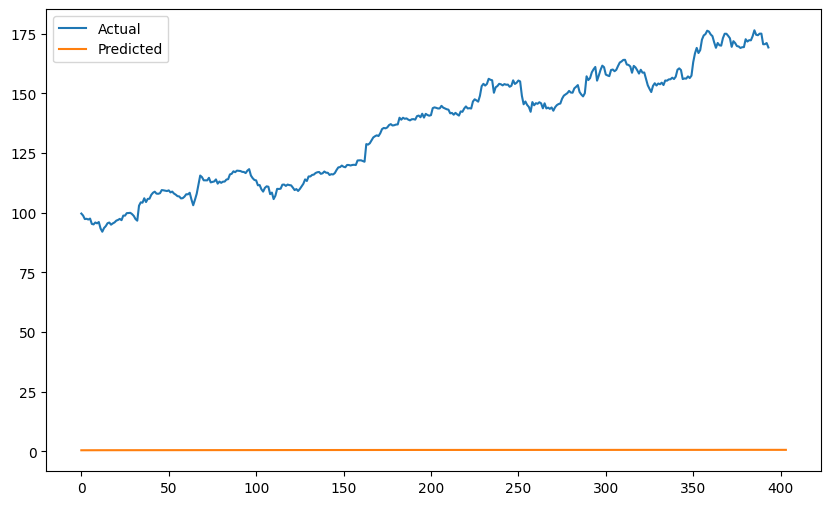

In [85]:
import matplotlib.pyplot as plt
actual = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(actual, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()

In [86]:
from tensorflow.keras.layers import LSTM, Dense

In [87]:
#LSTM MODEL
# Create the LSTM model
lst_model = Sequential()
lst_model.add(LSTM(units=200,  return_sequences=True,input_shape=(seq_length, 1)))
lst_model.add(LSTM(units=100 , return_sequences=True ))
lst_model.add(LSTM(units=50 , return_sequences=False ))
lst_model.add(Dense(units=1))

# Compile the model
lst_model.compile(optimizer='adam', loss='mean_squared_error')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [88]:
 # Train the model on the training set
start = time.time()
history = lst_model.fit(X_test, y_test,validation_data=(X_val, y_val),epochs=20, batch_size=50, verbose=1)
end = time.time()
print(f"Training time: {end - start} seconds")

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.2372 - val_loss: 0.0162
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0245 - val_loss: 0.0246
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0086 - val_loss: 0.0011
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0021 - val_loss: 0.0037
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0013 - val_loss: 7.9550e-04
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.4952e-04 - val_loss: 0.0012
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.7217e-04 - val_loss: 9.0887e-04
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.5274e-04 

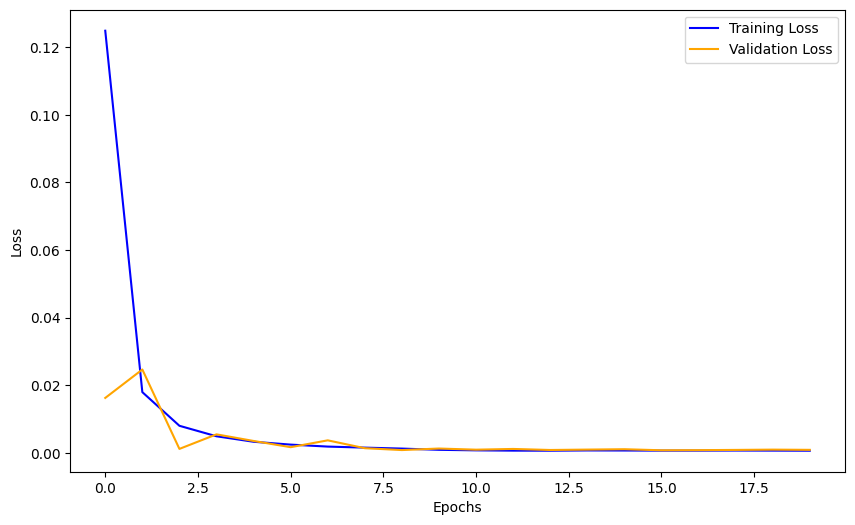

In [89]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
#plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [90]:
predictions = lst_model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


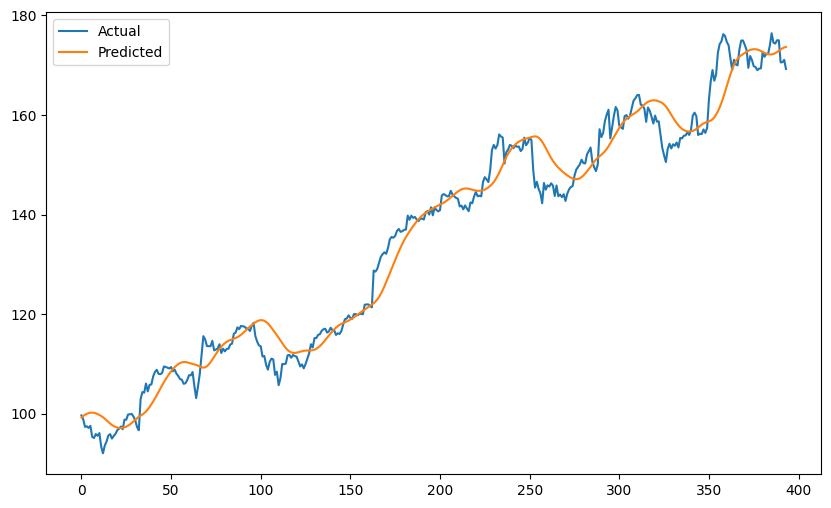

In [91]:
actual = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot
plt.plot(actual, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()

In [92]:
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [93]:
mse = mean_squared_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

Mean Squared Error (MSE): 16.5350
Mean Absolute Percentage Error (MAPE): 2.3102%


**MUltivariate case**

In this data preparation, we need to make sure that your input data includes multiple features for each time step

In [94]:
data.head()

,Close
Date,
2006-01-03,10.68
2006-01-04,10.71
2006-01-05,10.63
2006-01-06,10.90
2006-01-09,10.86


In [210]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/AAPL_2006-01-01_to_2018-01-01 (1).csv", parse_dates=['Date'])
data.set_index('Date', inplace=True)
data = data[['Volume', 'Close']]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

scaled_data = pd.DataFrame(scaled_data, columns=['Volume', 'Close'], index=data.index)
scaled_data.head()

,Volume,Close
Date,,
2006-01-03,0.228877,0.020333
2006-01-04,0.172820,0.020511
2006-01-05,0.121329,0.020038
2006-01-06,0.197963,0.021634
2006-01-09,0.189213,0.021397


In [211]:
X_try,y_try = [],[]
for i in range(len(scaled_data) - seq_length - 1):
  if i + seq_length < len(scaled_data):
    X_try.append(scaled_data[i:(i + seq_length)].values)
    y_try.append(scaled_data.iloc[i + seq_length, -1])

In [212]:
y_try[0]

0.010166686369547227

In [213]:
scaled_data.Close.iloc[50]

0.011526185128265747

In [214]:
def create_multivariate_sequences(dataset, seq_length):
    X, y = [], []
    for i in range(len(dataset) - seq_length - 1):
        if i + seq_length < len(dataset):
            X.append(dataset[i:(i + seq_length)].values)
            y.append(dataset.iloc[i + seq_length, -1])

    return np.array(X), np.array(y)

In [215]:
seq_length = 60

Create the train, valid and test set

In [216]:
train_size = int(len(scaled_data) * 0.7)
print(train_size)
val_size = int(len(scaled_data) * 0.15)
print(val_size)

train_data = scaled_data[:train_size]
val_data = scaled_data[train_size:train_size + val_size]
test_data = scaled_data[train_size + val_size:]

print(train_data.shape, val_data.shape, test_data.shape)

X_train, y_train = create_multivariate_sequences(train_data, seq_length)
X_val, y_val = create_multivariate_sequences(val_data, seq_length)
X_test, y_test = create_multivariate_sequences(test_data, seq_length)


2113
452
(2113, 2) (452, 2) (454, 2)


In [217]:
y_test.shape

(393,)

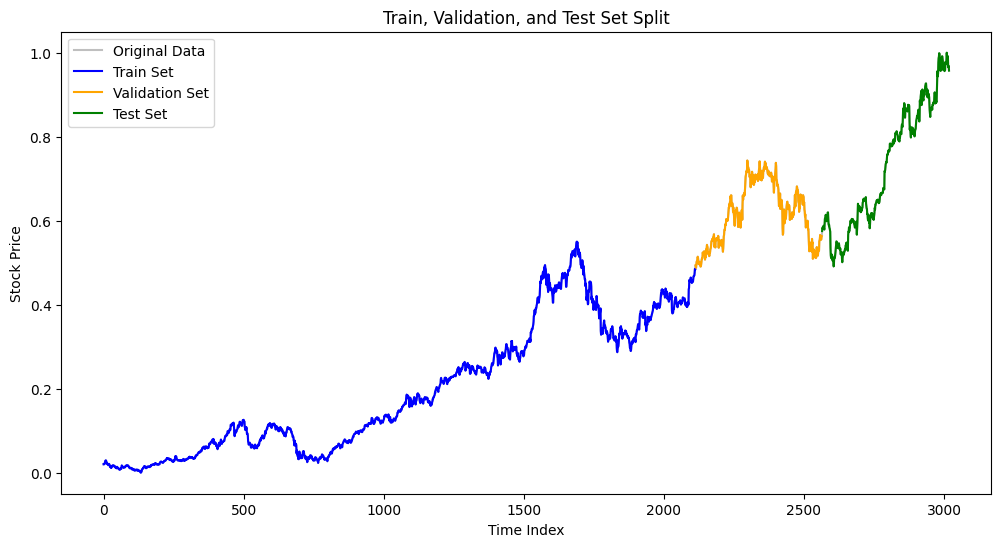

In [218]:
data_values = scaled_data['Close'].values

# Create indices
train_idx = range(len(train_data.Close))
val_idx = range(len(train_data.Close), len(train_data.Close) + len(val_data.Close))
test_idx = range(len(train_data.Close) + len(val_data.Close), len(scaled_data.Close))

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data_values, label="Original Data", color="gray", alpha=0.5)
plt.plot(train_idx, data_values[:len(train_data)], label="Train Set", color="blue")
plt.plot(val_idx, data_values[len(train_data):len(train_data) + len(val_data)], label="Validation Set", color="orange")
plt.plot(test_idx, data_values[len(train_data) + len(val_data):], label="Test Set", color="green")

# Add labels and legend
plt.title("Train, Validation, and Test Set Split")
plt.xlabel("Time Index")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [219]:
X_train.shape, X_val.shape, X_test.shape

((2052, 60, 2), (391, 60, 2), (393, 60, 2))

In [220]:
y_train.shape, y_val.shape, y_test.shape

((2052,), (391,), (393,))

the rnn model is still the dame except the change on input shape

In [221]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM

def build_rnn_model(seq_length, num_features):
    model = Sequential([
        LSTM(200, return_sequences=True, input_shape=(seq_length, num_features)),
        LSTM(50, return_sequences=False),
        Dense(25, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Look at the structure of the model

In [222]:
print(X_train.shape)
num_features = X_train.shape[2]
model = build_rnn_model(seq_length, num_features)
model.summary()

(2052, 60, 2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 60, 200)             │         162,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 50)                  │          50,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,901 (835.55 KB)

 Trainable params: 213,901 (835.55 KB)

 Non-trainable params: 0 (0.00 B)

In [223]:
# Train the model
start = time.time()
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Training time: {end - start} seconds")

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0105 - val_loss: 7.7613e-04
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9247e-04 - val_loss: 0.0015
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9227e-04 - val_loss: 7.0213e-04
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8444e-04 - val_loss: 0.0016
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6767e-04 - val_loss: 6.3830e-04
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4119e-04 - val_loss: 4.7474e-04
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6414e-04 - val_loss: 6.2921e-04
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5083e-04 - val_loss: 6.9554e-04
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0863e-04 - val_loss: 8.8256e-04
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3861e-04 - val_loss: 4.4130e-04
Epoch 11/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4559e-04 - val_loss: 4.3207e-

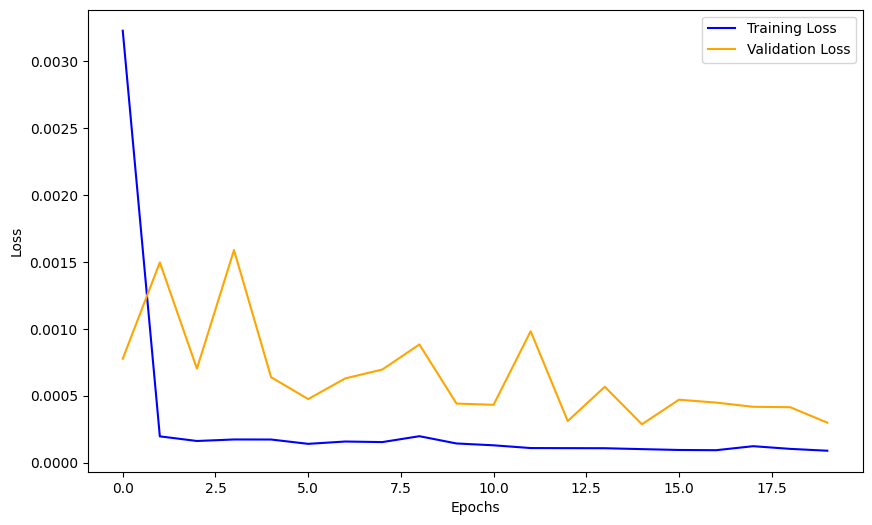

In [224]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
#plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

predictions and evaluation

In [225]:
y_test.shape

(393,)

In [227]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")

predictions = model.predict(X_test)

y_test_original = scaler.inverse_transform(
    np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1)
)[:, 0]
predictions_original = scaler.inverse_transform(
    np.concatenate([predictions, np.zeros((predictions.shape[0], 1))], axis=1)
)[:, 0]


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mse = mean_squared_error(y_test_original, predictions_original)
mape = mean_absolute_percentage_error(y_test_original, predictions_original)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


Test Loss (MSE): 0.0004869643598794937
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 336916756384580.2
Mean Absolute Percentage Error (MAPE): 0.02205714703268627


Visualize thre results

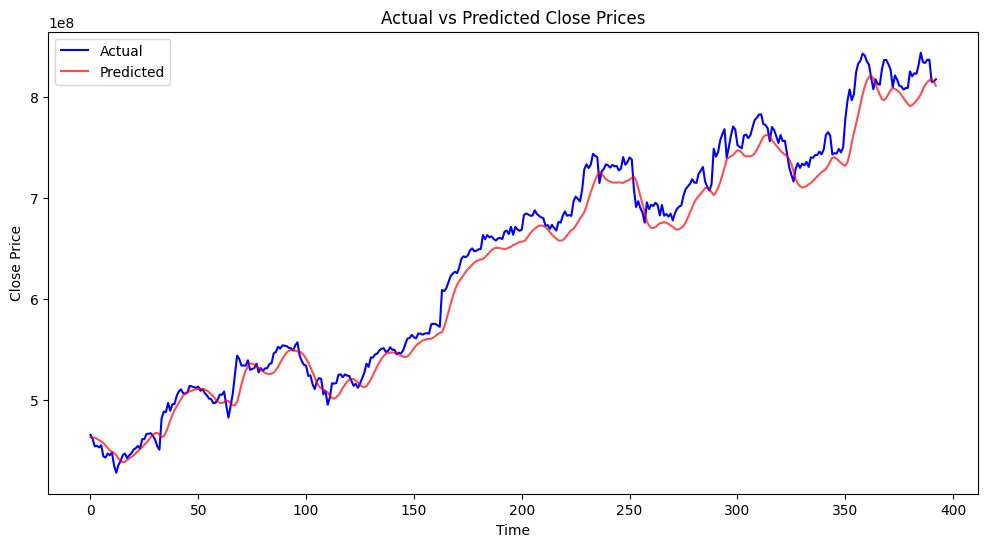

In [228]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predictions_original, label='Predicted', color='red', alpha=0.7)
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()
